In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer
import nltk

In [ ]:
df = pd.read_csv("data.csv")
df.dropna()

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE
4236,John Howard,Daniel Roberts,-210.0,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE
4238,Mike Pierce,Julio Paulino,-420.0,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE


In [ ]:
columns_to_display = ['date', 'R_odds', 'B_odds', 'Winner', 'weight_class']

df_selected = df[columns_to_display]
df_selected['year'] = pd.to_datetime(df['date']).dt.year
df_selected['year'] = df_selected['year'].apply(lambda x: f"{int(x):.0f}" if pd.notnull(x) else "")

df_selected.rename(columns={
    'R_odds': 'r_odds',
    'B_odds': 'b_odds',
    'Winner': 'winner'
}, inplace=True)

def is_underdog_win(row):
    if row['r_odds'] > 0 and row['winner'].lower() == 'red':
        return True
    elif row['b_odds'] > 0 and row['winner'].lower() == 'blue':
        return True
    else:
        return False

df_selected['underdog_win'] = df_selected.apply(is_underdog_win, axis=1)

df_selected = df_selected[['year', 'r_odds', 'b_odds', 'winner', 'weight_class', 'underdog_win']].dropna()

df_selected.head()

<ipython-input-3-d1e6ec785ccd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['year'] = pd.to_datetime(df['date']).dt.year
<ipython-input-3-d1e6ec785ccd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['year'] = df_selected['year'].apply(lambda x: f"{int(x):.0f}" if pd.notnull(x) else "")
<ipython-input-3-d1e6ec785ccd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

,year,r_odds,b_odds,winner,weight_class,underdog_win
0,2020,-145.0,135.0,Blue,Lightweight,True
1,2020,160.0,-170.0,Blue,Welterweight,False
2,2020,-345.0,315.0,Red,Lightweight,False
3,2020,-137.0,127.0,Blue,Light Heavyweight,True
4,2020,-160.0,150.0,Red,Lightweight,False


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4240 entries, 0 to 4239
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4240 non-null   object 
 1   r_odds        4240 non-null   float64
 2   b_odds        4240 non-null   float64
 3   winner        4240 non-null   object 
 4   weight_class  4240 non-null   object 
 5   underdog_win  4240 non-null   bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 331.9+ KB


In [ ]:
total_underdog_wins = df_selected['underdog_win'].sum()


print("Total number of underdog wins:", total_underdog_wins)

Total number of underdog wins: 1351


In [ ]:
df_sorted = df_selected.sort_values(by='r_odds')
df_sorted



,year,r_odds,b_odds,winner,weight_class,underdog_win
2190,2015,-1700.0,1100.0,Red,Women's Bantamweight,False
3414,2012,-1650.0,1300.0,Red,Featherweight,False
2364,2015,-1600.0,1050.0,Red,Middleweight,False
1866,2016,-1500.0,1200.0,Red,Catch Weight,False
2158,2015,-1500.0,1000.0,Red,Women's Strawweight,False
...,...,...,...,...,...,...
725,2018,600.0,-750.0,Blue,Lightweight,False
2243,2015,650.0,-1000.0,Blue,Women's Strawweight,False
1420,2017,650.0,-1000.0,Blue,Bantamweight,False
302,2020,655.0,-830.0,Red,Women's Flyweight,True


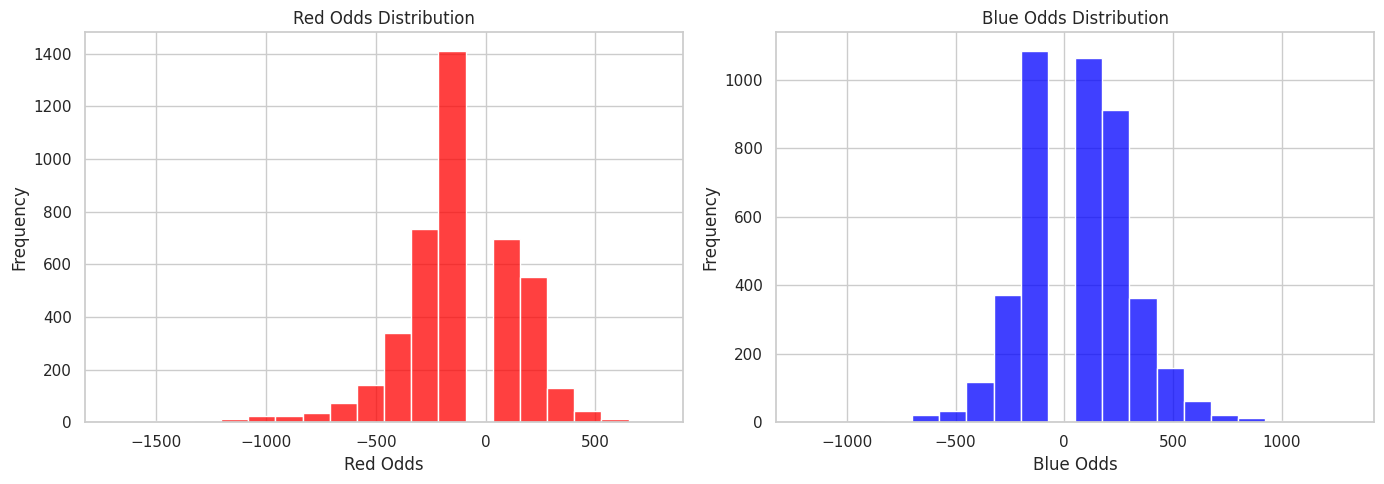

In [ ]:
sns.set_theme(style="whitegrid")

# Distribution of Odds - Histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_selected['r_odds'], bins=20, ax=axes[0], color='red')
axes[0].set_title('Red Odds Distribution')
axes[0].set_xlabel('Red Odds')
axes[0].set_ylabel('Frequency')

sns.histplot(df_selected['b_odds'], bins=20, ax=axes[1], color='blue')
axes[1].set_title('Blue Odds Distribution')
axes[1].set_xlabel('Blue Odds')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-8-9b518ca5770e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winner', data=df_selected, ax=axes[0], palette='Set3')
<ipython-input-8-9b518ca5770e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='underdog_win', data=df_selected, ax=axes[1], palette='Set1')


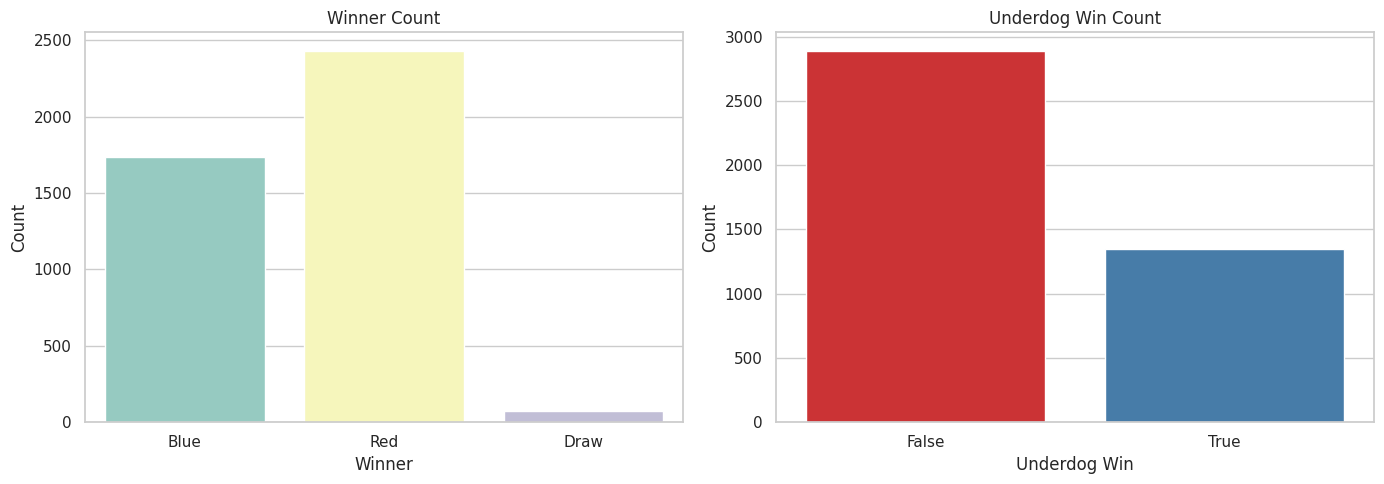

In [ ]:
# Win Frequency - Bar Charts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot winner count
sns.countplot(x='winner', data=df_selected, ax=axes[0], palette='Set3')
axes[0].set_title('Winner Count')
axes[0].set_xlabel('Winner')
axes[0].set_ylabel('Count')

# Plot underdog win count
sns.countplot(x='underdog_win', data=df_selected, ax=axes[1], palette='Set1')
axes[1].set_title('Underdog Win Count')
axes[1].set_xlabel('Underdog Win')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

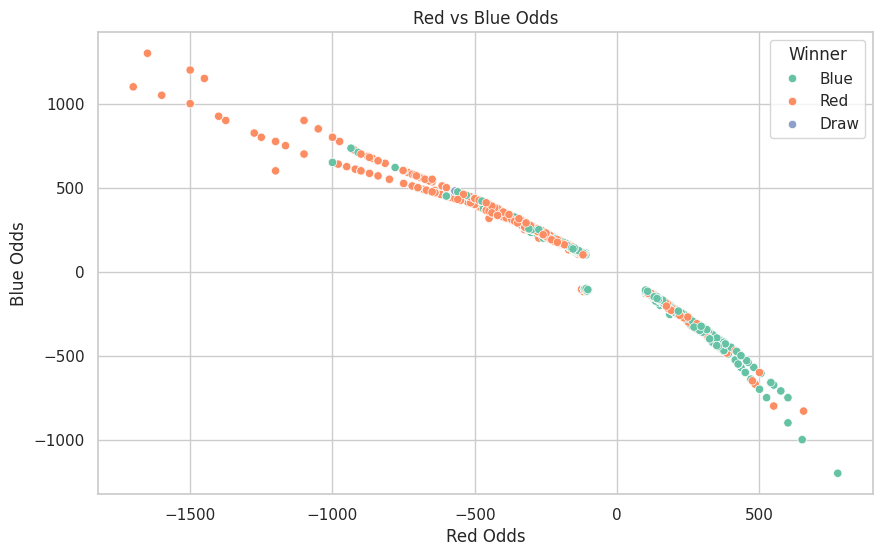

In [ ]:
# Odds vs. Outcome - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='r_odds', y='b_odds', hue='winner', data=df_selected, palette='Set2')
plt.title('Red vs Blue Odds')
plt.xlabel('Red Odds')
plt.ylabel('Blue Odds')
plt.legend(title='Winner')
plt.grid(True)
plt.show()

<ipython-input-10-0bd484f1697e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='winner', y='r_odds', data=df_selected, ax=axes[0], palette='Set3')
<ipython-input-10-0bd484f1697e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='winner', y='b_odds', data=df_selected, ax=axes[1], palette='Set3')


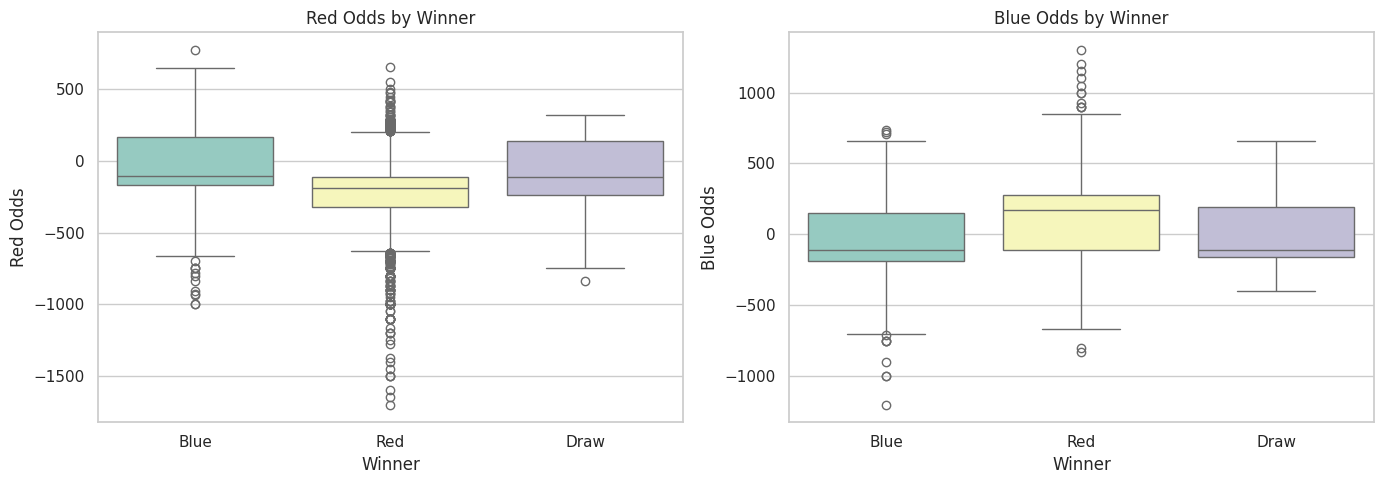

In [ ]:
# Odds vs. Outcome - Box Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='winner', y='r_odds', data=df_selected, ax=axes[0], palette='Set3')
axes[0].set_title('Red Odds by Winner')
axes[0].set_xlabel('Winner')
axes[0].set_ylabel('Red Odds')

sns.boxplot(x='winner', y='b_odds', data=df_selected, ax=axes[1], palette='Set3')
axes[1].set_title('Blue Odds by Winner')
axes[1].set_xlabel('Winner')
axes[1].set_ylabel('Blue Odds')

plt.tight_layout()
plt.show()

Decision Tree - Accuracy: 0.58, Precision: 0.65, Recall: 0.60, F1-score: 0.62
Random Forest - Accuracy: 0.58, Precision: 0.63, Recall: 0.68, F1-score: 0.65
Gradient Boosting - Accuracy: 0.65, Precision: 0.66, Recall: 0.82, F1-score: 0.73
Logistic Regression - Accuracy: 0.67, Precision: 0.68, Recall: 0.79, F1-score: 0.73


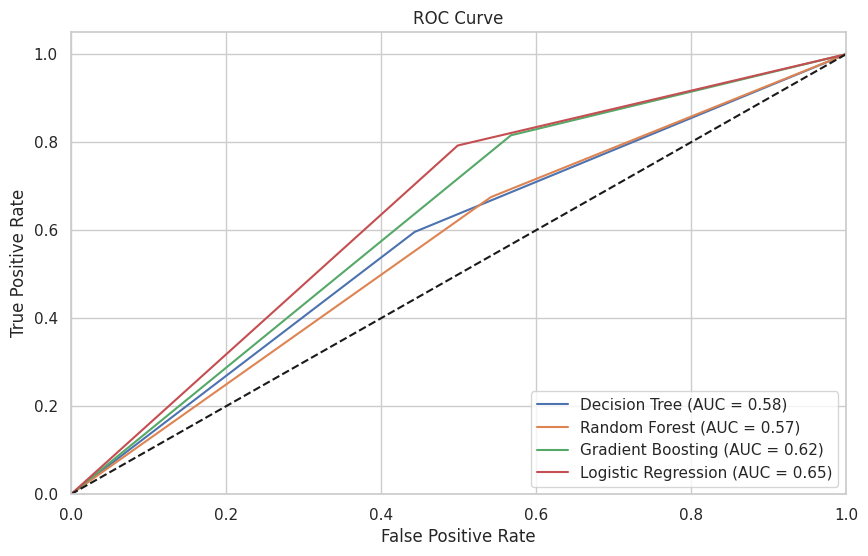

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Preprocess the data for modeling
X = df_selected[['r_odds', 'b_odds', 'weight_class']]
y = df_selected['winner'].apply(lambda x: 1 if x.lower() == 'red' else 0)

# Encode categorical variables
X = pd.get_dummies(X, columns=['weight_class'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the models
models = {'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf, 'Gradient Boosting': y_pred_gb, 'Logistic Regression': y_pred_lr}
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

# ROC Curve
plt.figure(figsize=(10, 6))
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.best_estimator_.predict(X_test)

# Random Forest Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

# Gradient Boosting Hyperparameter Tuning
gb_params = {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.best_estimator_.predict(X_test)

# Logistic Regression Hyperparameter Tuning
lr_params = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.best_estimator_.predict(X_test)



Decision Tree - Accuracy: 0.62, Precision: 0.67, Recall: 0.69, F1-score: 0.68
Random Forest - Accuracy: 0.64, Precision: 0.66, Recall: 0.75, F1-score: 0.70
Gradient Boosting - Accuracy: 0.66, Precision: 0.66, Recall: 0.85, F1-score: 0.74
Logistic Regression - Accuracy: 0.67, Precision: 0.68, Recall: 0.79, F1-score: 0.73


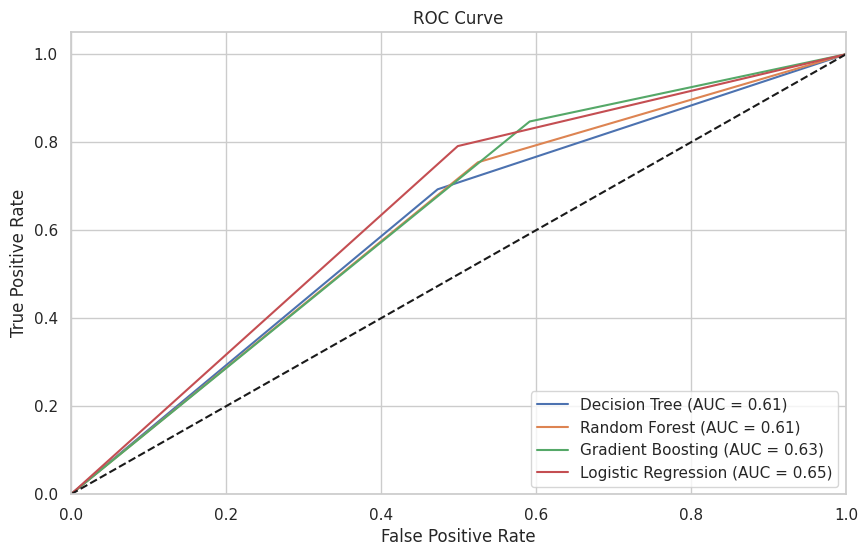

In [ ]:
# Evaluate the models
models = {'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf, 'Gradient Boosting': y_pred_gb, 'Logistic Regression': y_pred_lr}
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

# ROC Curve
plt.figure(figsize=(10, 6))
for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


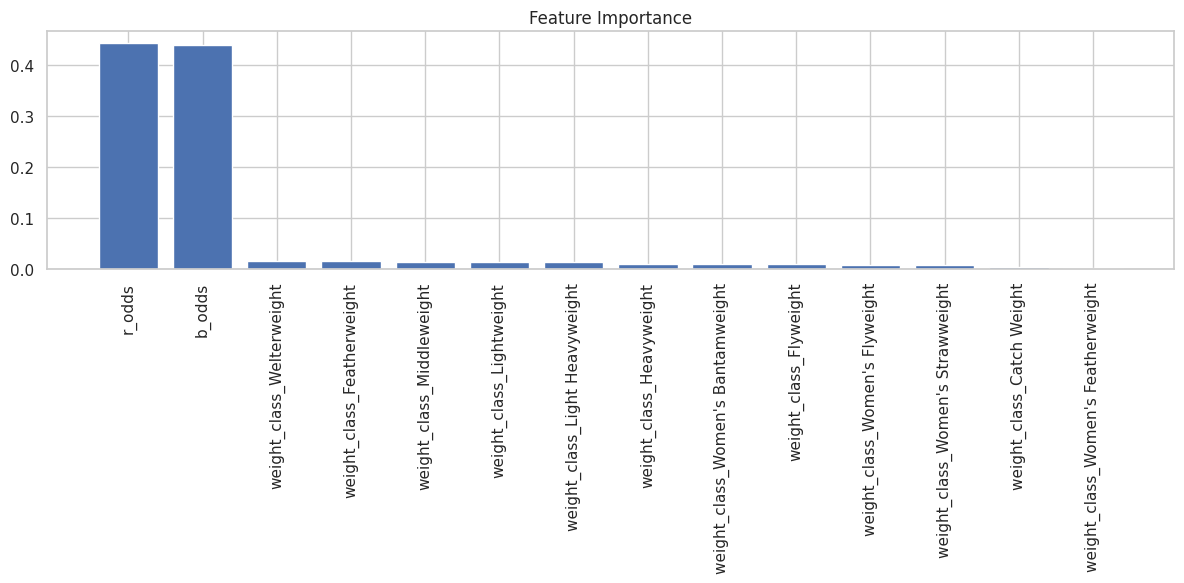

In [ ]:
# Feature Importance for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Evaluation Metrics
for model_name, y_pred in models.items():
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("\n")

Model: Decision Tree
Confusion Matrix:
[[284 255]
 [225 508]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       539
           1       0.67      0.69      0.68       733

    accuracy                           0.62      1272
   macro avg       0.61      0.61      0.61      1272
weighted avg       0.62      0.62      0.62      1272

ROC-AUC: 0.61


Model: Random Forest
Confusion Matrix:
[[256 283]
 [180 553]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.47      0.53       539
           1       0.66      0.75      0.70       733

    accuracy                           0.64      1272
   macro avg       0.62      0.61      0.62      1272
weighted avg       0.63      0.64      0.63      1272

ROC-AUC: 0.61


Model: Gradient Boosting
Confusion Matrix:
[[220 319]
 [112 621]]
Classification Report:
              precision    recall  f1-score   support

